**Build** **a** *python* **app** **to** **track** **Amazon** **price**

In [182]:
!pip install requests

In [313]:
import requests
from bs4 import BeautifulSoup
import smtplib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [252]:
url="https://www.amazon.in/Apple-iPhone-Plus-Space-Grey/dp/B0714DP3BG/ref=sr_1_1_sspa?crid=1RU96F1KKANPP&dchild=1&keywords=iphone+8+plus&qid=1596116634&sprefix=iphone+%2Caps%2C424&sr=8-1-spons&psc=1&spLa=ZW5jcnlwdGVkUXVhbGlmaWVyPUE1TVI2VFFNU1pBMEImZW5jcnlwdGVkSWQ9QTAwMTk4NDMxQk9LMTlKSzRITEhMJmVuY3J5cHRlZEFkSWQ9QTEwMDcwMTNaQ1hXODNTUFhTNFUmd2lkZ2V0TmFtZT1zcF9hdGYmYWN0aW9uPWNsaWNrUmVkaXJlY3QmZG9Ob3RMb2dDbGljaz10cnVl"

In [253]:
browser_agent={"user-Agent" :'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.89 Safari/537.36 '}

In [254]:
product_page= requests.get(url,headers=browser_agent)

Next step is to create beautiful soup object from the html.This is done by pssing the html the BeautifulSoup() function. The Beautiful soup package is used to parse the html. that is take the raw html and break it into python objects.

In [255]:
soup=BeautifulSoup(product_page.content, 'html.parser')

The soup object allows you to extract intersting about the website youre scraping such a getting the title of the page
you can also get the test of the webpage and quickly print it out to check if is what you expect

<!DOCTYPE doctype html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-in">
 <!-- sp:feature:head-start -->
 <head>
  <script>
   var aPageStart = (new Date()).getTime();
  </script>
  <meta charset="utf-8"/>
  <script>
   var ue_t0=ue_t0||+new Date();
  </script>
  <!-- sp:feature:cs-optimization -->
  <meta content="on" http-equiv="x-dns-prefetch-control"/>
  <link href="https://images-eu.ssl-images-amazon.com" rel="dns-prefetch"/>
  <link href="https://m.media-amazon.com" rel="dns-prefetch"/>
  <link href="https://completion.amazon.com" rel="dns-prefetch"/>
  <script>
   (function(a){var b=a.performance;a.ue_mark=b&&"function"===typeof b.mark?function(a){b.mark(a)}:function(){}})(window);

    ue_mark('csm:ho:ob');
  </script>
  <script>
   window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;

if (window.ue_ihb === 1) {

    var ue_csm = window,
        ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=function(b){return 
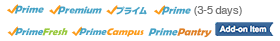
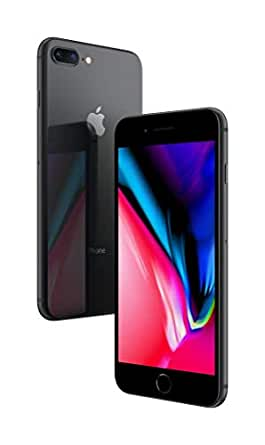

In [256]:
print(soup.prettify())

In [258]:
print(soup.find_all('p'))

[<p><strong>Display</strong></p>, <p>5.5-inch Retina HD display with True Tone</p>, <p><strong>Capacity</strong></p>, <p>64GB, 256GB</p>, <p><strong>Splash, Water, and Dust Resistant</strong></p>, <p>All-glass and aluminum design, water and dust resistant (rated IP67)</p>, <p><strong>Camera &amp; Video</strong></p>, <p>Dual 12MP cameras with Portrait mode, Portrait Lighting, Auto HDR, and 4K video up to 60 fps</p>, <p><strong>Front Camera</strong></p>, <p>7MP FaceTime HD camera with Auto HDR</p>, <p><strong>Power and Battery</strong></p>, <p>Talk time (wireless): Up to 21 hours; Internet use: Up to 13 hours; Video playback (wireless): Up to 14 hours</p>, <p><strong>In the Box</strong></p>, <p>iPhone, EarPods with Lightning Connector, Lightning to USB Cable, 5W USB Power Adapter</p>, <p><strong>Height</strong></p>, <p>158.4 mm (6.24 inches)</p>, <p><strong>Width</strong></p>, <p>78.1 mm (3.07 inches)</p>, <p><strong>Depth</strong></p>, <p>7.5 mm (0.30 inches)</p>, <p><strong>Weight</str

Delivery Associate will place the order on your doorstep and step back to maintain a 2-meter distance.
Delivery Associate will place the order on your doorstep and step back to maintain a 2-meter distance.
No customer signatures are required at the time of delivery.
No customer signatures are required at the time of delivery.
For Pay-on-Delivery orders, we recommend paying using Credit card/Debit card/Netbanking via the pay-link sent via SMS at the time of delivery. To pay by cash, place cash on top of the delivery box and step back.
For Pay-on-Delivery orders, we recommend paying using Credit card/Debit card/Netbanking via the pay-link sent via SMS at the time of delivery. To pay by cash, place cash on top of the delivery box and step back.
Sign in/Create a free business account 
Sign in/Create a free business account 

        Find answers in product info, Q&As, reviews
      

        Find answers in product info, Q&As, reviews
      

    Your question may be answered by sellers, m

In [259]:
for url in soup.find_all('a'):
  print(url.get('href'))

/dp/B07XVLMZHH/260-6019418-3222763
/dp/B07XVLMXY7/260-6019418-3222763
/dp/B07XVKG5XV/260-6019418-3222763
/dp/B07JWV47JW/260-6019418-3222763
/stores/page/A2CBF012-185A-4168-8756-2EB2C31451EB/260-6019418-3222763?_encoding=UTF8&ingress=0&ref_=topnav_storetab_inappledevicessubnav&visitId=913e599e-2ae6-444f-9abe-eb3de3fe76f3
/stores/page/54BC8A08-9143-4B3A-85D7-0FB7A1D2B088/260-6019418-3222763?_encoding=UTF8&ingress=0&productGridPageIndex=4&ref_=topnav_storetab_inappledevicessubnav&visitId=913e599e-2ae6-444f-9abe-eb3de3fe76f3
mailto:?body=I%20want%20to%20recommend%20this%20product%20at%20Amazon.com%0A%0AApple%20iPhone%208%20Plus%20(64GB)%20-%20Space%20Grey%0Aby%20Appario%20Retail%20Private%20Ltd%0ALearn%20more%3A%20https%3A%2F%2Fwww.amazon.in%2Fdp%2FB0714DP3BG%2Fref%3Dcm_sw_em_r_mt_dp_U_Y7SiFbHEAN9ZJ&subject=I%20want%20to%20recommend%20this%20product%20on%20Amazon
mailto:?body=I%20want%20to%20recommend%20this%20product%20at%20Amazon.com%0A%0AApple%20iPhone%208%20Plus%20(64GB)%20-%20Space%20


var aPageStart = (new Date()).getTime();
var ue_t0=ue_t0||+new Date();






(function(a){var b=a.performance;a.ue_mark=b&&"function"===typeof b.mark?function(a){b.mark(a)}:function(){}})(window);

    ue_mark('csm:ho:ob');


window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;

if (window.ue_ihb === 1) {

    var ue_csm = window,
        ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=function(b){return f()-(b?0:d.ue_t0)};e.stub=function(b,a){if(!b[a]){var c=[];b[a]=function(){c.push([c.slice.call(arguments),e.d(),d.ue_id])};b[a].replay=function(b){for(var a;a=c.shift();)b(a[0],a[1],a[2])};b[a].isStub=1}};e.exec=function(b,a){return function(){try{return b.apply(this,arguments)}catch(c){ueLogError(c,{attribution:a||"undefined",logLevel:"WARN"})}}}})(ue_csm);


        var ue_err_chan = 'jserr-rw';
(function(d,e){function h(f,b){if(!(a.ec>a.mxe)&&f){a.ter.push(f);b=b||{};var c=f.logLevel||b.logLevel;c&&c!==k&&c!==m&&c!==n&&c!==p
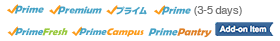

In [260]:
print(soup.get_text())

In [261]:
page_title= soup.find(id= "productTitle").get_text()


In [262]:
product_price= soup.find(id= "priceblock_ourprice").get_text()[2:8]


In [263]:

product_price=product_price.replace(',', '')
final_price= float(product_price)
final_price

41999.0

In [319]:
def send_mail():
  server= smtplib.SMTP("smtp.gmail.com",587)
  server.ehlo()
  server.starttls()
  subject= "PRICE DOWN"
  server.login("preetibarua9@gmail.com","ptkba@61")
  
  body = "check out the amazon product link: https://www.amazon.in/CPH2035-OPPO-Reno3-%E0%A4%AA%E0%A5%8D%E0%A4%B0%E0%A5%8B/dp/B07X9YNV5Y/ref=sr_1_3?crid=37JN42O4NXXKD&dchild=1&keywords=oppo+reno+3+pro&qid=1596107786&sprefix=oppo+re%2Caps%2C334&sr=8-31"
  msg= f"Subject: {subject}\n\n {body}"
  s.sendmail ( "preetibarua9@gmail.com"," preetibarua98@gmail.com",msg )
  print("mail sent")
  s.quit()


  

In [321]:
if( final_price < 41999.0):
  send_mail()

